In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import schur, eigvals

def get_tilde_v_XY(eta_XY, rho_Y, bar_rho_Y, kappa=0.7):
    return 1 + kappa * np.tanh(eta_XY/kappa * (rho_Y - bar_rho_Y))

def get_tilde_v(eta_AA, eta_AB, eta_BA, eta_BB, rho_A, rho_B, bar_rho_A, bar_rho_B, kappa=0.7):
    drho_A = rho_A - bar_rho_A
    drho_B = rho_B - bar_rho_B
    inv_kappa = 1. / kappa
    v_AA = 1 + kappa * np.tanh(eta_AA * inv_kappa * drho_A)
    v_AB = 1 + kappa * np.tanh(eta_AB * inv_kappa * drho_B)
    v_BA = 1 + kappa * np.tanh(eta_BA * inv_kappa * drho_A)
    v_BB = 1 + kappa * np.tanh(eta_BB * inv_kappa * drho_B)
    return v_AA, v_AB, v_BA, v_BB

def get_v_A(rho_A, rho_B, bar_rho_A, bar_rho_B, etaAA, etaAB, bar_v_A=1., kappa=0.7):
    v_AA = get_tilde_v_XY(etaAA, rho_A, bar_rho_A, kappa)
    v_AB = get_tilde_v_XY(etaAB, rho_B, bar_rho_B, kappa) 
    return bar_v_A * v_AA * v_AB

def get_v_B(rho_A, rho_B, bar_rho_A, bar_rho_B, etaBA, etaBB, bar_v_B=1., kappa=0.7):
    v_BA = get_tilde_v_XY(etaBA, rho_A, bar_rho_A, kappa)
    v_BB = get_tilde_v_XY(etaBB, rho_B, bar_rho_B, kappa)
    return bar_v_B * v_BA * v_BB

def get_tilde_v_XY_derive(eta_XY, tilde_v_XY, kappa=0.7):
    return eta_XY * (1 - ((tilde_v_XY - 1)/kappa)**2)

def get_v0_omega(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, bar_vA=1., bar_vB=1., kappa=0.7):
    v_AA, v_AB, v_BA, v_BB = get_tilde_v(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, kappa)
    vA_0 = bar_vA * v_AA * v_AB
    vB_0 = bar_vB * v_BA * v_BB
    v_AA_deriv = get_tilde_v_XY_derive(etaAA, v_AA)
    v_AB_deriv = get_tilde_v_XY_derive(etaAB, v_AB)
    v_BA_deriv = get_tilde_v_XY_derive(etaBA, v_BA)
    v_BB_deriv = get_tilde_v_XY_derive(etaBB, v_BB)
    omega_AA = phiA * v_AA_deriv / v_AA
    omega_AB = phiA * v_AB_deriv / v_AB
    omega_BA = phiB * v_BA_deriv / v_BA
    omega_BB = phiB * v_BB_deriv / v_BB
    return vA_0, vB_0, omega_AA, omega_AB, omega_BA, omega_BB

# Equations for $\rho_S, f_{1,S}, \dots, f_{n, S}$

We get the hierarchies
$$
	\partial_t f_{k,S} =
	-\frac{1}{2} \nabla^* (v_S f_{k+1,S})
	- \frac{1}{2} \nabla(v_S f_{k-1,S})
	- D_r k^2 f_{k,S}
	+ D_t \Delta f_{k,S}.
$$

Truncating it at order $\epsilon^{n+2}$, we get equations for $\rho_S,f_{1,S}, \dots,f_{n+1,S}$:
$$
\begin{aligned}
	\partial_t \rho_S &= -\Re [\nabla^* (v_S f_{1,S})]  + D_t \Delta \rho_S\\
	\partial_t f_{1,S} &= -\frac{1}{2} \nabla^* (v_S f_{2,S}) - \frac{1}{2}\nabla(v_S\rho_S)
	- D_r f_{1,S} +  D_t \Delta f_{1,S},\\
	\partial_t f_{2,S} &= -\frac{1}{2} \nabla^* (v_S f_{3,S}) - \frac{1}{2}\nabla(v_S f_{1,S}) - 4 D_r f_{2,S} + D_t \Delta f_{2,S}, \\
	&\vdots \\
	\partial_t f_{n,S} &= -\frac{1}{2} \nabla^* (v_S f_{n+1,S}) - \frac{1}{2}\nabla(v_S f_{n-1, S}) - n^2 D_r f_{n,S} + D_t \Delta f_{n,S}, \\
	\partial_t f_{n+1, S} &= -\frac{1}{2}\nabla(v_S f_{n, S}) - (n+1)^2 D_r f_{n+1, S}.
\end{aligned}
$$


## n=0
For the case of $n=0$, by letting $\partial_t f_{2,S}=0$ we get $f_{1,S}=-\frac{1}{2 D_r}\nabla(v_S \rho_S)$. Substituting it into the equation for $\rho_S$, we get
$$
\partial_t \rho_S = -\frac{1}{2D_r} \nabla (v_S\nabla(v_S \rho_S)) + D_t \Delta \rho_S
$$
By expanding aroud the homegenous state $(\rho_S=\rho_{S,0})$, we get
$$
\partial_t \begin{pmatrix}
\delta \rho_A \\
\delta \rho_B
\end{pmatrix} = (M - D_t q^2 I_2) \begin{pmatrix}
\delta \rho_A \\
\delta \rho_B
\end{pmatrix},
$$
where
$$
M=\frac{1}{2D_r}\begin{pmatrix}
-v_{A,0}^2(1+\omega_{AA})q^2 & -v_{A,0}^2 \omega_{AB}q^2 \\
-v_{B,0}^2 \omega_{BA}q^2 & -v_{B,0}^2 (1+\omega_{BB})q^2
\end{pmatrix}
$$



In [2]:
def get_M_rho(qx, qy, omega, v_A0, v_B0, D_r):
    c = -(qx**2 + qy**2) / (2 * D_r)
    m00 = v_A0**2 * (1 + omega[0, 0])
    m11 = v_B0**2 * (1 + omega[1, 1])
    m01 = v_A0**2 * omega[0, 1]
    m10 = v_B0**2 * omega[1, 0]
    M = c * np.array([[m00, m01], [m10, m11]])
    return M


## n > 0
For $n>0$ cases, assuming $\partial_t f_{n+1,S}=0$, we get $f_{n+1,S}=-\frac{1}{2(n+1)^2 D_r}\nabla(v_Sf_{n,S})$. Substituting this expression into the equation for $f_{n, S}$, we get

$$
\begin{aligned}
	\partial_t \rho_S &= -\Re [\nabla^* (v_S f_{1,S})]  + D_t \Delta \rho_S\\
	\partial_t f_{1,S} &= -\frac{1}{2} \nabla^* (v_S f_{2,S}) - \frac{1}{2}\nabla(v_S\rho_S)
	- D_r f_{1,S} +  D_t \Delta f_{1,S},\\
	\partial_t f_{2,S} &= -\frac{1}{2} \nabla^* (v_S f_{3,S}) - \frac{1}{2}\nabla(v_S f_{1,S}) - 4 D_r f_{2,S} + D_t \Delta f_{2,S}, \\
	&\vdots \\
	\partial_t f_{n-1, S} &= -\frac{1}{2} \nabla^* (v_S f_{n, S}) -\frac{1}{2}\nabla(v_S f_{n-2, S}) - (n-1)^2 f_{n-1, S} + D_t \Delta f_{n-1, S} \\ 
	\partial_t f_{n,S} &= \frac{1}{4(n+1)^2 D_r} \nabla^* (v_S \nabla(v_S f_{n,S})) - \frac{1}{2}\nabla(v_S f_{n-1, S}) - n^2 D_r f_{n,S} + D_t \Delta f_{n,S}.
\end{aligned}
$$

Defining $\mathbf{\Phi}_S=(\rho_S, \Re(f_{1,S}), \Im(f_{1,S}), \cdots, \Re(f_{n,S}), \Im(f_{n, S}))^T$, then the length of vector $\mathbf{\Phi}_S$ is $2n+1$. Expanding $\mathbf{\Phi}_S$ around the homegenous state $\mathbf{\Phi}_{S,0}=(\rho_{S,0}, 0, \cdots, 0)^T$, the dynamics of fluctuations $\delta \mathbf{\Phi}=(\delta \rho_S, \Re (f_{1, S}),\Im (f_{1,S}) \cdots, \Re(f_{n,S}), \Im(f_{n,S}))^T$ are described by 
$$
\partial_t \delta \mathbf{\Phi}_S = (M_{SS}-D_t q^2 I_{2n+1}) \delta \mathbf{\Phi}_S + M_{SS'} \delta \mathbf{\Phi}_{S'},
$$
where $S\neq S'$ and $I_{2n+1}$ denotes the unit matrix with order $2n+1$. $M_{SS}$ describes the intra-species interactions, which reads
$$
M_{SS} = \begin{pmatrix}
0 & C_{0, 1} & \mathbf{0}  & \mathbf{0} & \cdots &\mathbf{0}\\
C_{1,0} & C_{1,1} & C_{1,2} & \mathbf{0} &\cdots &\mathbf{0}\\
\mathbf{0} & C_{2,1} & C_{2,2} & C_{2,3} &\cdots &\mathbf{0}\\
\mathbf{0} & \mathbf{0} & C_{3,2} & C_{3,3} &\cdots &\vdots\\
\vdots & \vdots &\vdots &\vdots & \ddots &C_{n-1, n} \\
\mathbf{0} & \mathbf{0} & \mathbf{0} &\cdots & C_{n, n-1} & C_{n,n}
\end{pmatrix},
$$
where $C_{i,j}$ is the coupling matrix between $\partial_t\delta f_{i, S}$ and $\delta f_{j, S}$, which reads
$$
\begin{aligned}
C_{0,1} &= -i v_{S,0} \mathbf{q}^T,\\
C_{1,0} &= -\frac{iv_{S,0}(1+\omega_{SS})}{2}\mathbf{q},\\
C_{k, k+1} &= -\frac{iv_{S,0}}{2}\begin{pmatrix}
q_x & q_y \\
-q_y & q_x
\end{pmatrix} \quad \mathrm{for} \quad k\geq 1, \\
C_{k+1, k} &= C_{k, k+1}^T \quad \mathrm{for} \quad k\geq 1, \\
C_{k, k} &= -\left(\frac{v_{S,0}^2}{4(k+1)^2D_r}q^2\delta_{k,n}+k^2 D_r\right) \begin{pmatrix}
1 & 0 \\
0& 1
\end{pmatrix} \quad \mathrm{for} \quad 1 \leq k \leq n.
\end{aligned}
$$
On the other hand, the matrix $M_{SS'}$ accounting for inter-species interactions is simple:
$$
M_{SS'} = \begin{pmatrix}
0 & O_{1, 2n} \\
-\frac{iv_{S,0}\omega_{SS'}}{2}\mathbf{q} & O_{2, 2n} \\
O_{2n-2, 1} & O_{2n-2, 2n}
\end{pmatrix},
$$
where $O_{n,m}$ denotes the zero matrix of size $n\times m$.

In [3]:
def get_M_SS(qx, qy, omega_SS, vS_0, Dr, n):
    def get_C_kk(k):
        if k == n:
            C_kk = -(vS_0**2/(4 * (k+1)**2 * Dr) * (qx**2 + qy**2)  + k**2 * Dr) * np.eye(2)
        else:
            C_kk = -k**2 * Dr * np.eye(2)
        return C_kk

    q_vec = np.array([[qx],
                      [qy]])
    C_00 = np.zeros((1, 1))
    C_01 = -1j * vS_0 * q_vec.T
    C_10 = -0.5j * vS_0 * (1 + omega_SS) * q_vec
    C_12 = -0.5j * vS_0 * np.array([[qx, qy],
                                    [-qy, qx]])
    C_21 = C_12.T

    if n == 1:
        C_11 = get_C_kk(1)
        M_SS = np.block([[C_00, C_01],
                         [C_10, C_11]])
    elif n == 2:
        C_02 = np.zeros((1, 2))
        C_20 = np.zeros((2, 1))
        C_11 = get_C_kk(1)
        C_22 = get_C_kk(2)
        M_SS = np.block([[C_00, C_01, C_02],
                         [C_10, C_11, C_12],
                         [C_20, C_21, C_22]])
    else:
        M_SS = np.zeros((2 * n + 1, 2 * n + 1), complex)
        M_SS[0, 1:3] = C_01
        M_SS[1:3, 0:5] = np.block([C_10, get_C_kk(1), C_12])
        for i in range(2, n):
            M_SS[2*i-1: 2*i+1, 2*i-3: 2*i+3] = np.block([C_21, get_C_kk(i), C_12])
        M_SS[n*2-1: n*2+1, n*2-3: n*2+1] = np.block([C_21, get_C_kk(n)])
    return M_SS


def get_M_XY(qx, qy, omegaXY, vX_0, n):
    M_XY = np.zeros((2*n + 1, 2*n + 1), complex)
    half_iv_omega = 0.5j * vX_0 * omegaXY
    M_XY[1, 0] = -half_iv_omega * qx
    M_XY[2, 0] = -half_iv_omega * qy
    return M_XY


def get_M(qx, qy, omega, vA_0, vB_0, Dr, n):
    if n == 0:
        M = get_M_rho(qx, qy, omega, vA_0, vB_0, Dr)
    else:
        M_AA = get_M_SS(qx, qy, omega[0, 0], vA_0, Dr, n)
        M_BB = get_M_SS(qx, qy, omega[1, 1], vB_0, Dr, n)
        M_AB = get_M_XY(qx, qy, omega[0, 1], vA_0, n)
        M_BA = get_M_XY(qx, qy, omega[1, 0], vB_0, n)
        # print(M_AA)
        # print(M_AB)
        # print(M_BA)
        # print(M_BB)
        M = np.block([[M_AA, M_AB], [M_BA, M_BB]])
    return M

qx = 1
qy = 1
omega = np.array([[0, 1], [-1, 0]])
vA_0 = vB_0 = 1
Dr = 0.1

n = 0
# get_M_SS(qx, qy, omega[0, 0], 1, 0.1, 1)
# get_M_XY(qx, qy, omega[1, 0], vA_0, 1)
get_M(qx, qy, omega, vA_0, vB_0, Dr, n=n)


array([[-10., -10.],
       [ 10., -10.]])

In [4]:
from scipy.linalg import eig

class DMatrix:
    def __init__(self, etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A=1., bar_rho_B=1., bar_vA=1., bar_vB=1., kappa=0.7):
        vA_0, vB_0, omegaAA, omegaAB, omegaBA, omegaBB = get_v0_omega(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, bar_vA, bar_vB, kappa)
        self.vA_0 = vA_0
        self.vB_0 = vB_0
        self.omega = np.array([[omegaAA, omegaAB],
                               [omegaBA, omegaBB]])
        self.Dr = Dr
        print(self.omega)
    
    def get_Mq(self, qx, qy, n):
        M = get_M(qx, qy, self.omega, self.vA_0, self.vB_0, self.Dr, n)
        return M

    def get_lambda(self, qx, qy, n):
        T, Z = schur(self.get_Mq(qx, qy, n), output="complex")
        eigen_values = np.diagonal(T)
        return eigen_values
    
    def get_eig(self, qx, qy, n):
        T, Z = schur(self.get_Mq(qx, qy, n), output="complex")
        w, vr = eig(T)
        return w, vr

    
    def get_lambda_q1D(self, qx_arr, qy_arr, n):
        lambda_arr = np.array([self.get_lambda(qx_arr[i], qy_arr[i], n) for i in range(qx_arr.size)])
        return lambda_arr

[[-2.73281767e+00  1.99176762e-02]
 [-2.21103480e+00 -3.82807430e-06]]
[[-2.73281767e+00  1.99176762e-02]
 [-2.21103480e+00 -3.82807430e-06]]
[[-2.73281767e+00  1.99176762e-02]
 [-2.21103480e+00 -3.82807430e-06]]
[[-2.73281767e+00  1.99176762e-02]
 [-2.21103480e+00 -3.82807430e-06]]


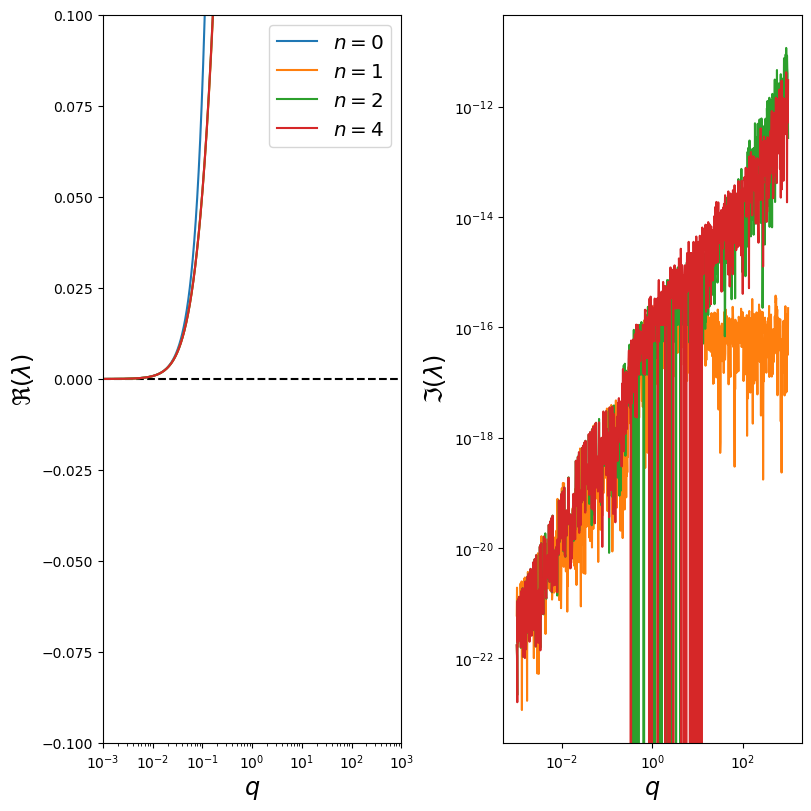

In [12]:
etaAA = etaBB = -2
etaAB = 0.5
etaBA = -etaAB
phiA = 25 / 20
phiB = 80 / 20
bar_rho_A = 1
bar_rho_B = 1

qmax = 10**3
q_arr = np.logspace(-3, np.log10(qmax), 1000)
theta = 0


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), constrained_layout=True)

ax1.axhline(0, linestyle="dashed", c="k")
n=4
Dr = 0.1
Dt = 0.
# for Dt in [0, 0.001, 0.01, 0.05, 0.07, 0.1]:
# for etaAA in [0, 1, 10, 1000]:
#     etaBB = etaAA
for n in [0, 1, 2, 4]:
# for phiB in [6/40, 10/40, 16/40]:
#     bar_rho_B = phiB
    M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A, bar_rho_B)
    qx_arr = q_arr * np.cos(theta)
    qy_arr = q_arr * np.sin(theta)
    lambda_arr = M.get_lambda_q1D(qx_arr, qy_arr, n=n)
    max_lambda = lambda_arr.max(axis=1)
    line, = ax1.plot(q_arr, max_lambda.real - q_arr**2 * Dt, label=r"$n=%g$" % (n))
    ax2.plot(q_arr, np.abs(max_lambda.imag), c=line.get_c())

ax1.set_xscale("log")
# ax1.set_yscale("log")
ax2.set_xscale("log")
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlim(1e-3, 1e3)
ax2.set_yscale("log")

ax1.set_ylabel(r"$\Re(\lambda)$", fontsize="xx-large")
ax2.set_ylabel(r"$\Im(\lambda)$", fontsize="xx-large")
ax1.set_xlabel(r"$q$", fontsize="xx-large")
ax2.set_xlabel(r"$q$", fontsize="xx-large")

ax1.legend(fontsize="x-large")

plt.axhline(0, c="tab:grey", linestyle="dashed")

plt.show()
# plt.savefig("r80_20_40_38_8.png")
plt.close()


In [6]:
class DMatrix_n2:
    def __init__(self, etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rhoA=1., bar_rhoB=1., bar_vA=1., bar_vB=1., kappa=0.7):
        vA_0, vB_0, omega_AA, omega_AB, omega_BA, omega_BB = get_v0_omega(
            etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rhoA, bar_rhoB, bar_vA, bar_vB, kappa)
        self.Dr = Dr
        self.vA2_over_16Dr = vA_0 **2 / (16 * Dr)
        self.vB2_over_16Dr = vB_0 ** 2 / (16 * Dr)
        self.M = np.zeros((4, 4), complex)
        self.M[0, 1] = -1j * vA_0
        self.M[1, 0] = -0.5j * vA_0 * (1 + omega_AA)
        # self.M[1, 1] = 
        self.M[1, 2] = -0.5j * vA_0 * omega_AB
        self.M[2, 3] = -1j * vB_0
        self.M[3, 0] = -0.5j * vB_0 * omega_BA
        self.M[3, 2] = -0.5j * vB_0 * (1 + omega_BB)
        # self.M[3, 3] =

    def get_M(self, q):
        M = self.M.copy()
        # M[1, 1] = -(self.Dr / q + self.vA2_over_16Dr * q)
        # M[3, 3] = -(self.Dr / q + self.vB2_over_16Dr * q)
        M[1, 1] = -(self.Dr / q)
        M[3, 3] = -(self.Dr / q)
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3]]) * q
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real

[[-0.73870561  0.27894396]
 [-1.30780513 -0.04718061]]
[[-0.73870561  0.27894396]
 [-1.30780513 -0.04718061]]
[[-0.73870561  0.27894396]
 [-1.30780513 -0.04718061]]
[[-0.73870561  0.27894396]
 [-1.30780513 -0.04718061]]


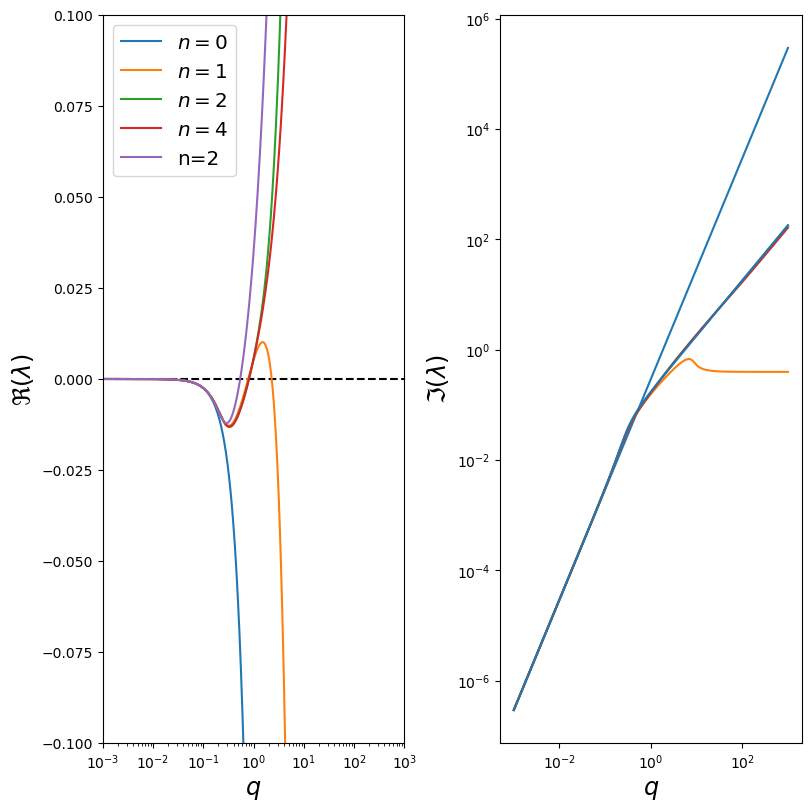

In [7]:
etaAA = etaBB = -2
etaAB = 0.5
etaBA = -etaAB
phiA = 17 / 10
phiB = 22.5 / 10
bar_rho_A = 1
bar_rho_B = 1

qmax = 10**3
q_arr = np.logspace(-3, np.log10(qmax), 1000)
theta = 0


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), constrained_layout=True)

ax1.axhline(0, linestyle="dashed", c="k")
n=4
Dr = 0.1
Dt = 0.

for n in [0, 1, 2, 4]:
    M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A, bar_rho_B)
    qx_arr = q_arr * np.cos(theta)
    qy_arr = q_arr * np.sin(theta)
    lambda_arr = M.get_lambda_q1D(qx_arr, qy_arr, n=n)
    max_lambda = lambda_arr.max(axis=1)
    line, = ax1.plot(q_arr, max_lambda.real - q_arr**2 * Dt, label=r"$n=%g$" % (n))
    ax2.plot(q_arr, np.abs(max_lambda.imag), c=line.get_c())

M2 = DMatrix_n2(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A, bar_rho_B)
lambda_arr = M2.get_lambda_q(q_arr).max(axis=1)
ax1.plot(q_arr, lambda_arr.real - Dt * q_arr**2, label=r"n=2")
ax2.plot(q_arr, np.abs(lambda_arr.imag), label=r"n=2")
ax1.set_xscale("log")
# ax1.set_yscale("log")
ax2.set_xscale("log")
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlim(1e-3, 1e3)
ax2.set_yscale("log")

ax1.set_ylabel(r"$\Re(\lambda)$", fontsize="xx-large")
ax2.set_ylabel(r"$\Im(\lambda)$", fontsize="xx-large")
ax1.set_xlabel(r"$q$", fontsize="xx-large")
ax2.set_xlabel(r"$q$", fontsize="xx-large")

ax1.legend(fontsize="x-large")

plt.axhline(0, c="tab:grey", linestyle="dashed")

plt.show()
# plt.savefig("r80_20_40_38_8.png")
plt.close()

[[-0.01593414  0.01593414]
 [-0.11153899 -0.58774816]]


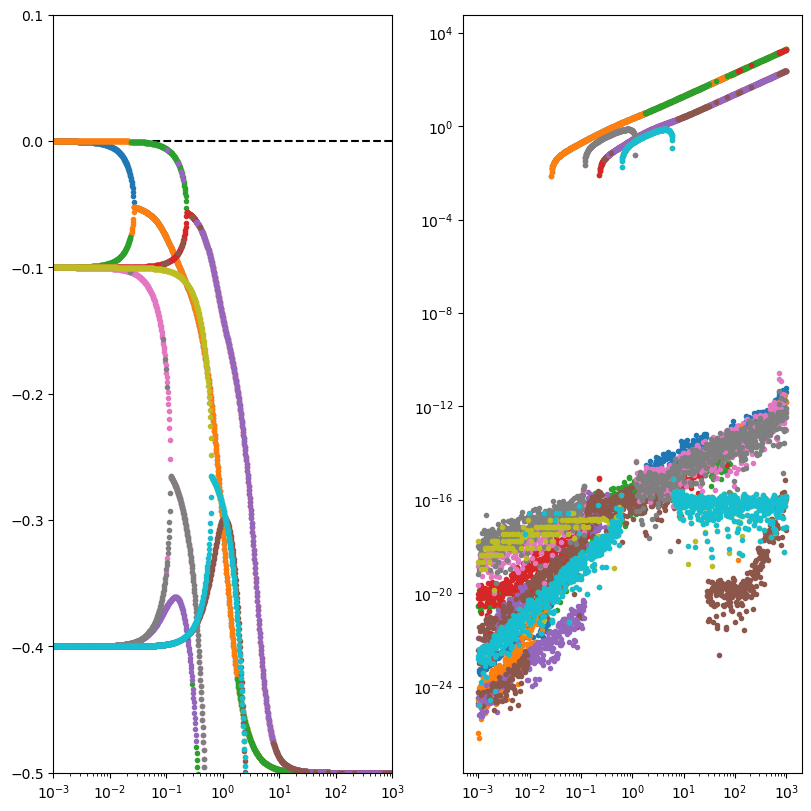

In [8]:
etaAA = etaBB = -2
etaAB = 2
etaBA = -etaAB
# phiA = 80 / 40
# phiB = 20 / 40
# bar_rho_A = 38/40
# bar_rho_B = 8/40
phiA = 10/40
phiB = 70/40
bar_rho_A = 1
bar_rho_B = 1
qmax = 10**3
q_arr = np.logspace(-3, np.log10(qmax), 1000)
theta = 0

Dr = 0.1
Dt = 0.

n = 2

M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A, bar_rho_B)
qx_arr = q_arr * np.cos(theta)
qy_arr = q_arr * np.sin(theta)
lambda_arr = M.get_lambda_q1D(qx_arr, qy_arr, n=n)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), constrained_layout=True)
ax1.axhline(0, linestyle="dashed", c="k")
for i in range(4*n + 2):
    line, = ax1.plot(q_arr, lambda_arr[:, i].real - q_arr**2 * Dt, ".", label=r"$n=%g$" % (n))
    ax2.plot(q_arr, np.abs(lambda_arr[:, i].imag), ".", c=line.get_c())
ax1.set_xscale("log")
# ax1.set_yscale("log")

ax2.set_xscale("log")
ax1.set_ylim(-0.5, 0.1)
ax1.set_xlim(1e-3, 1e3)
ax2.set_yscale("log")
plt.show()
plt.close()


In [9]:

etaAA = etaBB = -2
etaAB = 0.5
etaBA = -etaAB
phiA = 0 / 40
phiB = 20 / 40
bar_rho_A = 38/40
bar_rho_B = 8/40
qmax = 10**3
q_arr = np.logspace(-3, np.log10(qmax), 1000)
theta = 0

Dr = 0.1
Dt = 0.

n = 1

M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr, bar_rho_A, bar_rho_B)

w, vr = M.get_eig(10, 0, n)
print(w)
print(vr)


print(vr[1].dot(vr[1]))
print(vr[1].real.dot(vr[1].real))

[[-0.          0.        ]
 [-0.11518283 -1.00705713]]
[-2.35528881e+02+6.33479553e-17j -3.30481099e+01-5.30057543e-17j
 -8.02385731e-01+8.60819615e-19j  5.62765993e-03+2.10556105e-18j
 -2.36331267e+02+0.00000000e+00j -3.30424823e+01+0.00000000e+00j]
[[ 1.00000000e+00+0.00000000e+00j  1.67035288e-04+7.42386433e-18j
  -1.22451396e-01-2.16262378e-18j  5.10439718e-06+1.92940169e-19j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  9.99999986e-01+0.00000000e+00j
   3.73077082e-02+3.05468451e-18j  2.13806963e-01+3.40405540e-16j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   9.91773054e-01+0.00000000e+00j  1.08522242e-01+1.70481929e-16j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  9.70829288e-01+0.00000000e+00j
   0.00000000e+00+0.

[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0

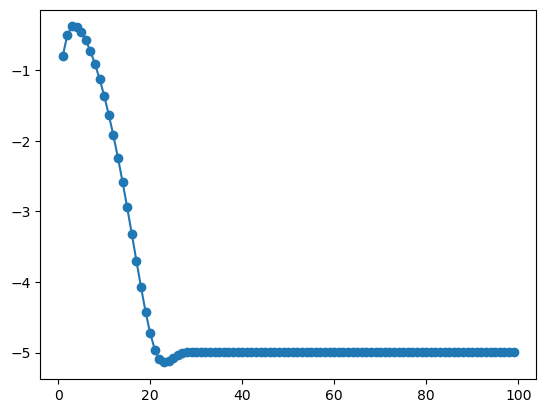

In [10]:
etaAA = etaBB = 0
etaAB = 0
etaBA = -etaAB
Dr=0.1
phiA = 1
phiB = 1

qx = 1000
qy = 0

n_arr = np.arange(1, 100)
lambda_arr = np.zeros(n_arr.size)
for i, n in enumerate(n_arr):
    M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA, phiB, Dr)
    lambda_arr[i] = M.get_lambda(qx, qy, n).max().real
plt.plot(n_arr, lambda_arr, "-o")
plt.show()
plt.close()

[[-0.3561157   0.36871917]
 [-0.26079358 -0.3561157 ]]
[[-1.9         0.14687658]
 [-0.75       -0.02366764]]


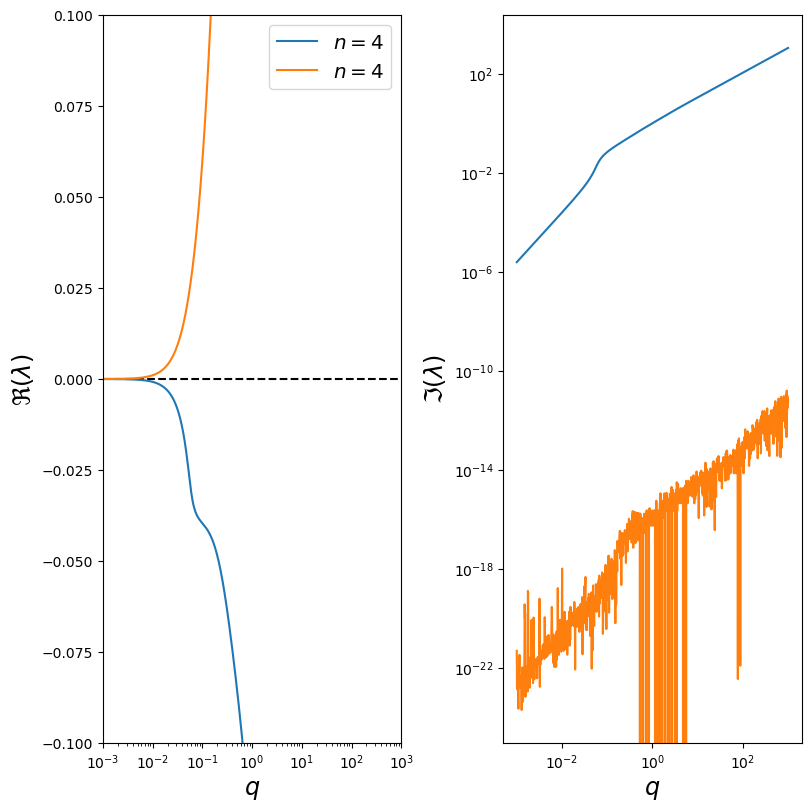

In [11]:
etaAA = etaBB = -2
etaAB = 0.5
etaBA = -etaAB

phiA = [26/40, 38/40]
phiB = [26/40, 60/40]
bar_rho_A =[1, 38/40]
bar_rho_B = [1, 8/40]

qmax = 10**3
q_arr = np.logspace(-3, np.log10(qmax), 1000)
theta = 0


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), constrained_layout=True)

ax1.axhline(0, linestyle="dashed", c="k")
n=4
Dr = 0.1
Dt = 0.

for i in range(2):
    M = DMatrix(etaAA, etaAB, etaBA, etaBB, phiA[i], phiB[i], Dr, bar_rho_A[i], bar_rho_B[i])
    qx_arr = q_arr * np.cos(theta)
    qy_arr = q_arr * np.sin(theta)
    lambda_arr = M.get_lambda_q1D(qx_arr, qy_arr, n=n)
    max_lambda = lambda_arr.max(axis=1)
    line, = ax1.plot(q_arr, max_lambda.real - q_arr**2 * Dt, label=r"$n=%g$" % (n))
    ax2.plot(q_arr, np.abs(max_lambda.imag), c=line.get_c())

ax1.set_xscale("log")
# ax1.set_yscale("log")
ax2.set_xscale("log")
ax1.set_ylim(-0.1, 0.1)
ax1.set_xlim(1e-3, 1e3)
ax2.set_yscale("log")

ax1.set_ylabel(r"$\Re(\lambda)$", fontsize="xx-large")
ax2.set_ylabel(r"$\Im(\lambda)$", fontsize="xx-large")
ax1.set_xlabel(r"$q$", fontsize="xx-large")
ax2.set_xlabel(r"$q$", fontsize="xx-large")

ax1.legend(fontsize="x-large")

plt.axhline(0, c="tab:grey", linestyle="dashed")

plt.show()
# plt.savefig("r80_20_40_38_8.png")
plt.close()
